# 1. Введение

✍ Ранее мы познакомились с моделями, которые позволяют решать основные задачи машинного обучения: задачи регрессии, классификации, кластеризации и понижения размерности. Давайте освежим наши знания — они нам, несомненно, пригодятся в этом модуле.

→ Строить модели на базовом уровне мы научились. И вот, казалось бы, мы уже можем назвать себя Junior дата-сайентистами.

Однако не стоит спешить. Это только начало пути, ведь машинное обучение включает в себя не только умение создать модель, импортировав её из библиотеки, а затем обучить её. Машинное обучение — это о том, как обучать модели для решения поставленной задачи правильным образом и объективно оценивать их качество.

✍ В этом модуле мы рассмотрим важную тему машинного обучения — валидация данных.

Мы:

- поговорим о том, какими способами можно разделять набор данных, чтобы грамотно оценивать качество модели и отлавливать переобучение;
- изучим, как не потерять качество модели при дисбалансе выборки, возникающем в контексте задачи классификации;
- чуть глубже погрузимся в уже знакомую нам тему недообучения и переобучения и посмотрим на основные способы их выявления и борьбы с ними;
- обсудим утечку данных: поймём, что это такое и чем она опасна;
- рассмотрим, чем визуализация может помочь при оценке качества моделей и что такое кривая обучения.

Цели модуля:

1. Узнать, что такое валидация и какие методы валидации бывают.
2. Познакомиться с дисбалансом выборки и понять, как он может влиять на качество обучения.
3. Научиться оценивать недообучение и переобучение и бороться с ними.
4. Научиться строить кривую обучения и с её помощью оценивать качество моделей.

# 2. Валидация данных. Методы валидации

Перед тем как приступить к изучению валидации данных, давайте постараемся ответить на следующий вопрос: «Почему нельзя обучать модель на всех доступных данных?»

→ Основная цель обучения модели — получить модель с хорошей прогностической способностью, которая решает поставленную задачу с заданным показателем метрики. 

Нам не столько важен результат предсказания на том наборе данных, на котором мы обучаем модель (нам уже известны все значения признаков в нём), сколько важно уметь предсказывать значения целевого признака для объектов, которых мы ещё не видели.

Таким образом, главная цель машинного обучения — усвоить общие закономерности в данных, а не просто запомнить **обучающий, или тренировочный, набор данных (training data).**

Поэтому так важно иметь отложенный набор данных (с известными правильными ответами), который модель не видела во время обучения. На нём мы будем оценивать качество обученной модели.

В предыдущих модулях по машинному обучению тот набор данных, на котором мы проверяли качество построенной модели, мы называли тестовым набором данных (testing data). Мы заранее выделяли этот набор данных для того, чтобы рассчитать финальную метрику модели и сделать вывод о том, устраивает ли нас качество моделирования. Такой подход называется двухкомпонентным.

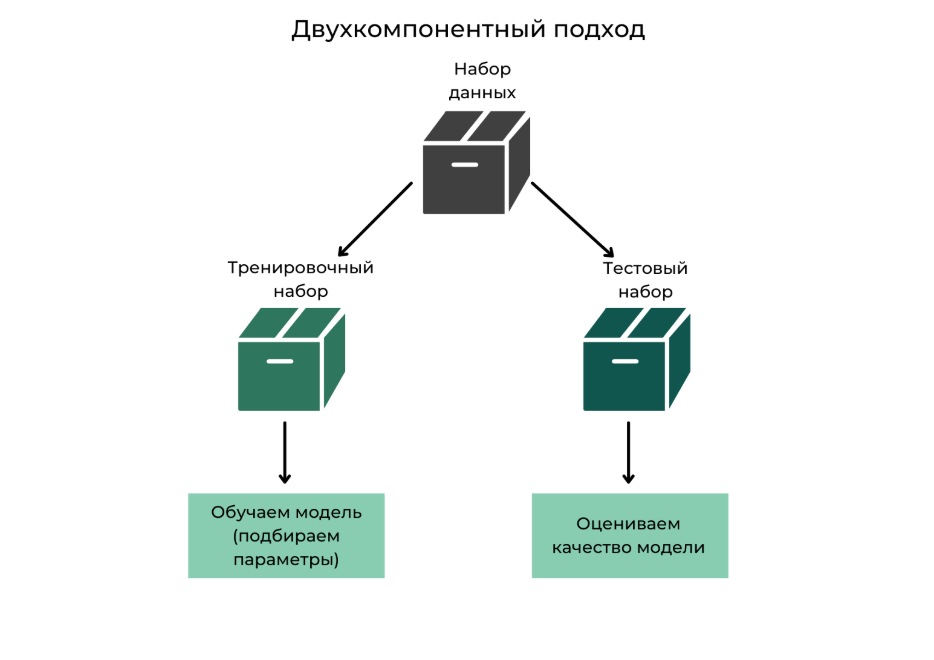

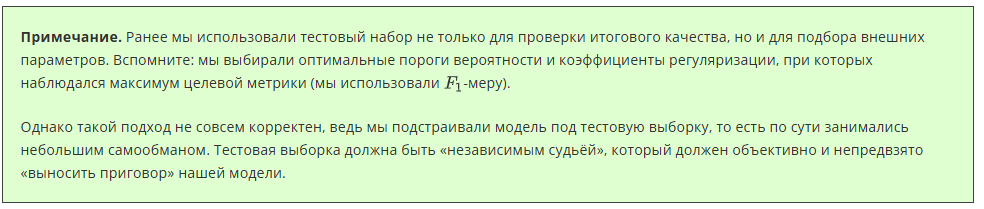

Из-за этого в больших Data Science-проектах используется не два, а три набора данных: в дополнение к тренировочному и тестовому набору данных выделяется валидационный набор (validation data). Этот набор используется для промежуточного контроля качества модели и настройки внешних параметров, которые задаёт исследователь при построении модели. Такой подход называется трёхкомпонентным.

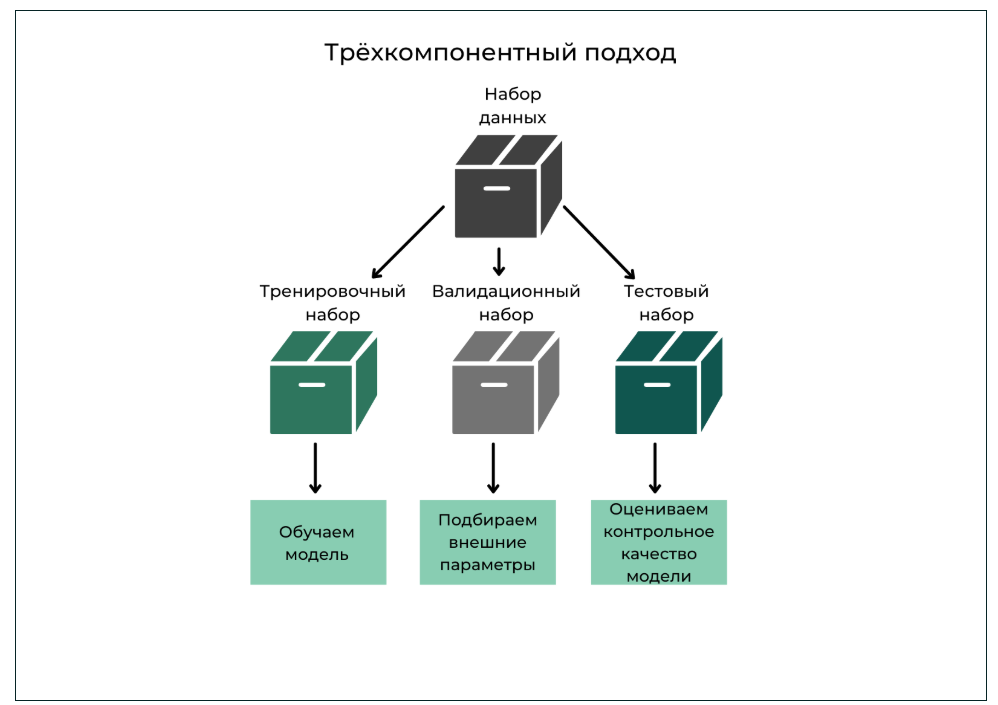

Итак, существует три основных вида выборок, которые используются в машинном обучении:

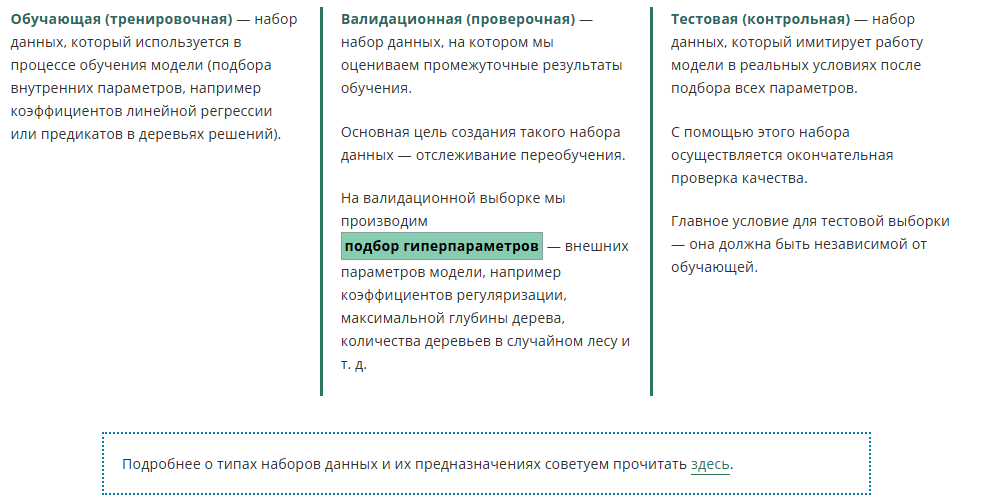

https://en.wikipedia.org/wiki/Training,_validation,_and_test_data_sets

Особенности терминологии

В промышленности, научных кругах и различной литературе термины **валидационная и тестовая выборка** зачастую употребляются как синонимы. Строго говоря, они не являются таковыми.

Тестирование — это попытка что-то выяснить, а валидация — доказать, что что-то является истиной (в нашем случае — доказать, что качество модели на валидационной выборке совпадает с качеством при обучении).

Вне зависимости от того, как будут называться контрольные выборки, важная концепция, которую необходимо сохранить, состоит в том, что **окончательный набор** (называемый тестом или валидацией) не используется в процессе обучения модели, а **используется исключительно для оценки её качества.**

Процесс проверки предсказательной способности модели машинного обучения называется **валидацией**.

Существует несколько методов такого контроля. Мы последовательно рассмотрим каждый из них.

Но прежде чем мы перейдём к обсуждению методов валидации, давайте познакомимся с данными, на которых будем практиковаться ↓

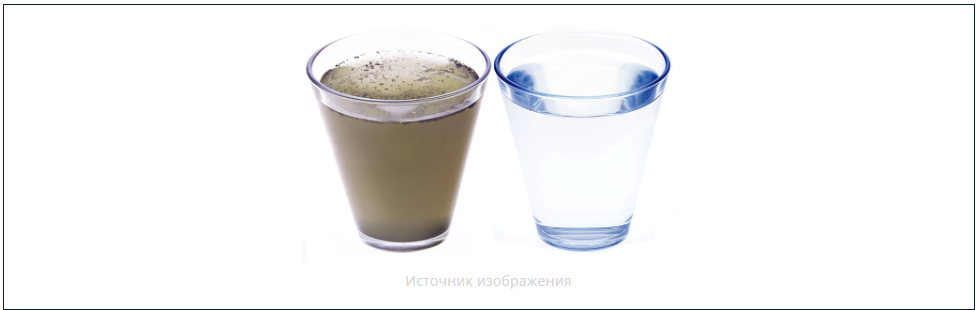

В этом модуле мы будем решать **задачу классификации**: классифицировать воду на пригодную  и не пригодную для питья на основе её химического состава.

Скачать набор данных можно здесь. С подробным описанием датасета и столбцов таблицы ознакомьтесь в источнике.

Переходим к работе с данными. Импортируем модули, которые нам понадобятся:

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
 
from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
#%matplotlib inline

Прочитаем данные о собранных образцах воды и выведем первые пять строк таблицы:

In [2]:
water_data = pd.read_csv('data/water_potability.csv')
water_data.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Невооруженным глазом видно, что большинство столбцов таблицы являются числовыми. Целевой признак — **Potability** (пригодность для питья): 1 — вода пригодна, 0 — вода не пригодна.

В данных есть пропуски. Выведем информацию о них в процентном соотношении:

In [3]:
display(water_data.isnull().mean() * 100)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

Итак, у нас отсутствует около 15 % информации о кислотности воды (ph), около 24 % — о содержании сульфатов (Sulfate) и около 5 % — о тригалометанах (Trihalomethanes). Мы знаем, что пропуски — непосильная ноша для большинства моделей машинного обучения. Их необходимо обработать.

Заполним пропуски медианным значением в признаке зависимости класса воды (Potability). Для этого сгруппируем данные по признаку Potability, посчитаем медиану в каждой группе, а затем отправим результат в метод fillna():

In [4]:
#Заполняем пропуски
water_data['ph'] = water_data['ph'].fillna(water_data.groupby('Potability')['ph'].transform('median'))
water_data['Sulfate'] = water_data['Sulfate'].fillna(water_data.groupby('Potability')['Sulfate'].transform('median'))
water_data['Trihalomethanes'] = water_data['Trihalomethanes'].fillna(water_data.groupby('Potability')['Trihalomethanes'].transform('median'))

Убедимся в отсутствии пропусков:

In [5]:
display(water_data.isnull().mean() * 100)

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

Теперь проблема пропусков устранена. Давайте по традиции разделим набор данных на матрицу наблюдений X и вектор правильных ответов y:

In [6]:
X = water_data.drop('Potability', axis=1)
y = water_data['Potability']

Рассмотрим основные методы валидации данных на примере нашего набора данных ↓

# HOLD-OUT

Метод hold-out (отложенная выборка) нам уже знаком. Это самый простой и очень популярный метод.

Его идея состоит в том, что для проверки модели мы просто случайным образом разбиваем весь набор данных на обучающую, валидационную и тестовую выборки (последняя — по желанию).

Обычно разбиение производится в соотношении 70/30 или 80/20 при двухкомпонентном подходе, и в соотношении 70/15/15 или 80/10/10 — при трёхкомпонентном.

Схема разбиения представлена ниже:

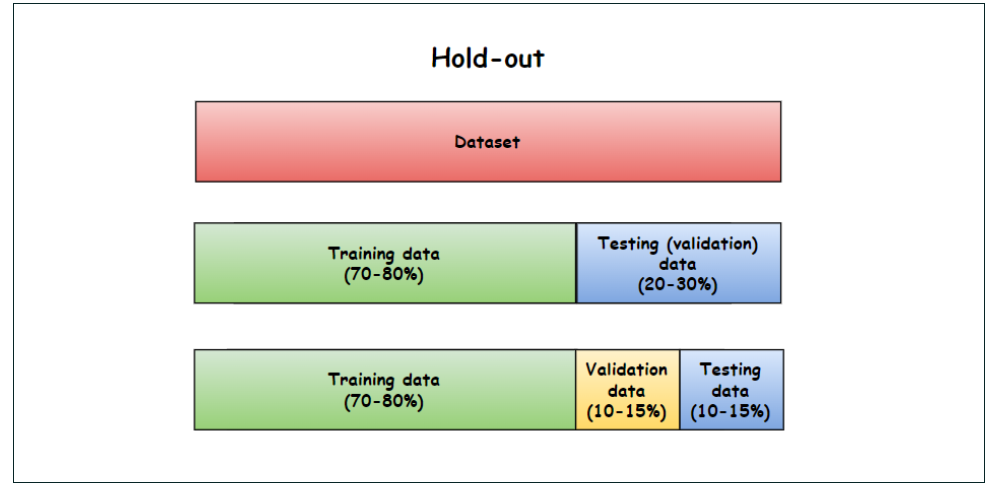

Преимущества и недостатки hold-out

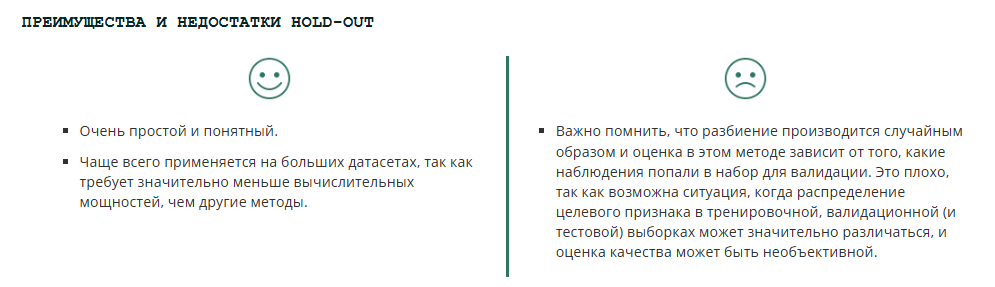

### Реализация метода в sklearn

се методы разбиения выборки и валидации, которые мы будем изучать, находятся в модуле model_selection, мы импортировали его заранее.

Метод **hold-out** реализован в уже знакомой вам функции train_test_split(). Она предназначена для разбиения исходного набора данных случайным образом на две части в заданных соотношениях.

Основные параметры train_test_split():

- *arrays — порядковый аргумент с переменным количеством. Набор массивов (это могут быть списки, numpy-массивы, DataFrame), которые подлежат разбиению.
- test_size — размер тестовой (валидационной) выборки. Может быть указан в долях. Если параметр train_size задан дробным числом с плавающей точкой, то параметр test_size определяется автоматически как 1-train_size.
- train_size — размер тренировочной выборки. Может быть указан в долях. Если параметр test_size задан дробным числом с плавающей точкой, то параметр train_size определяется автоматически как 1-test_size.
- random_state — число, на основе которого производится генерация случайных чисел.
- shuffle — параметр, указывающий, стоит ли перемешивать выборку перед разбиением (по умолчанию True).
- stratify — стратифицированное разбиение (о нём мы поговорим в юните по дисбалансу выборки).

Если мы используем **двухкомпонентный подход** (разбиваем выборку на тренировочную и валидационную, она же тестовая), то всё очень просто: нам лишь нужно вызвать функцию train_test_split() и передать в неё матрицу наблюдений X и вектор-столбец с правильными ответами y.

Для примера разделим выборку в соотношении 80/20 (test_size=0.2), в качестве значения параметра random_state по традиции возьмём число 42.

Функция вернёт четыре массива:

- таблицу X с обучающими примерами,
- таблицу X с примерами для валидации,
- столбец y с ответами на обучающие примеры,
- столбец y с ответами на валидационные примеры.

In [7]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

Проверим размеры полученных выборок: